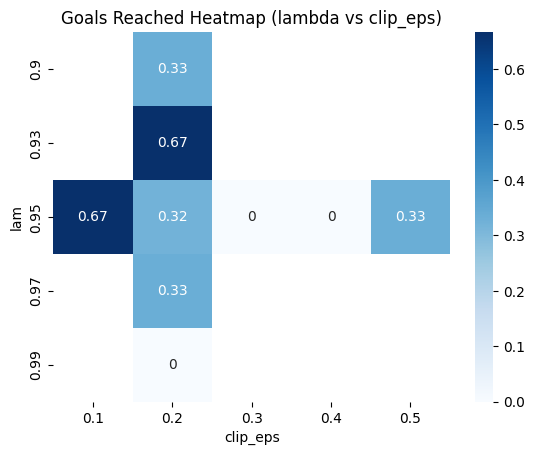

In [20]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('ppo_evaluation_results.csv')

pivot = df.pivot_table(values='goals_reached', index='lam', columns='clip_eps', aggfunc='mean')
sns.heatmap(pivot, annot=True, cmap="Blues")
plt.title('Goals Reached Heatmap (lambda vs clip_eps)')
plt.show()

/var/folders/gr/4y13phdj20gdftt920l0kd4c0000gn/T/ipykernel_2343/2487979661.py:45: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_data_str = annot_data.applymap(lambda x: f"{int(x)}" if not np.isnan(x) else "")
/var/folders/gr/4y13phdj20gdftt920l0kd4c0000gn/T/ipykernel_2343/2487979661.py:45: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_data_str = annot_data.applymap(lambda x: f"{int(x)}" if not np.isnan(x) else "")
/var/folders/gr/4y13phdj20gdftt920l0kd4c0000gn/T/ipykernel_2343/2487979661.py:45: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_data_str = annot_data.applymap(lambda x: f"{int(x)}" if not np.isnan(x) else "")
/var/folders/gr/4y13phdj20gdftt920l0kd4c0000gn/T/ipykernel_2343/2487979661.py:45: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_data_str = annot_data.applymap(lambda x: f"{int(x)}" if not np.isnan(

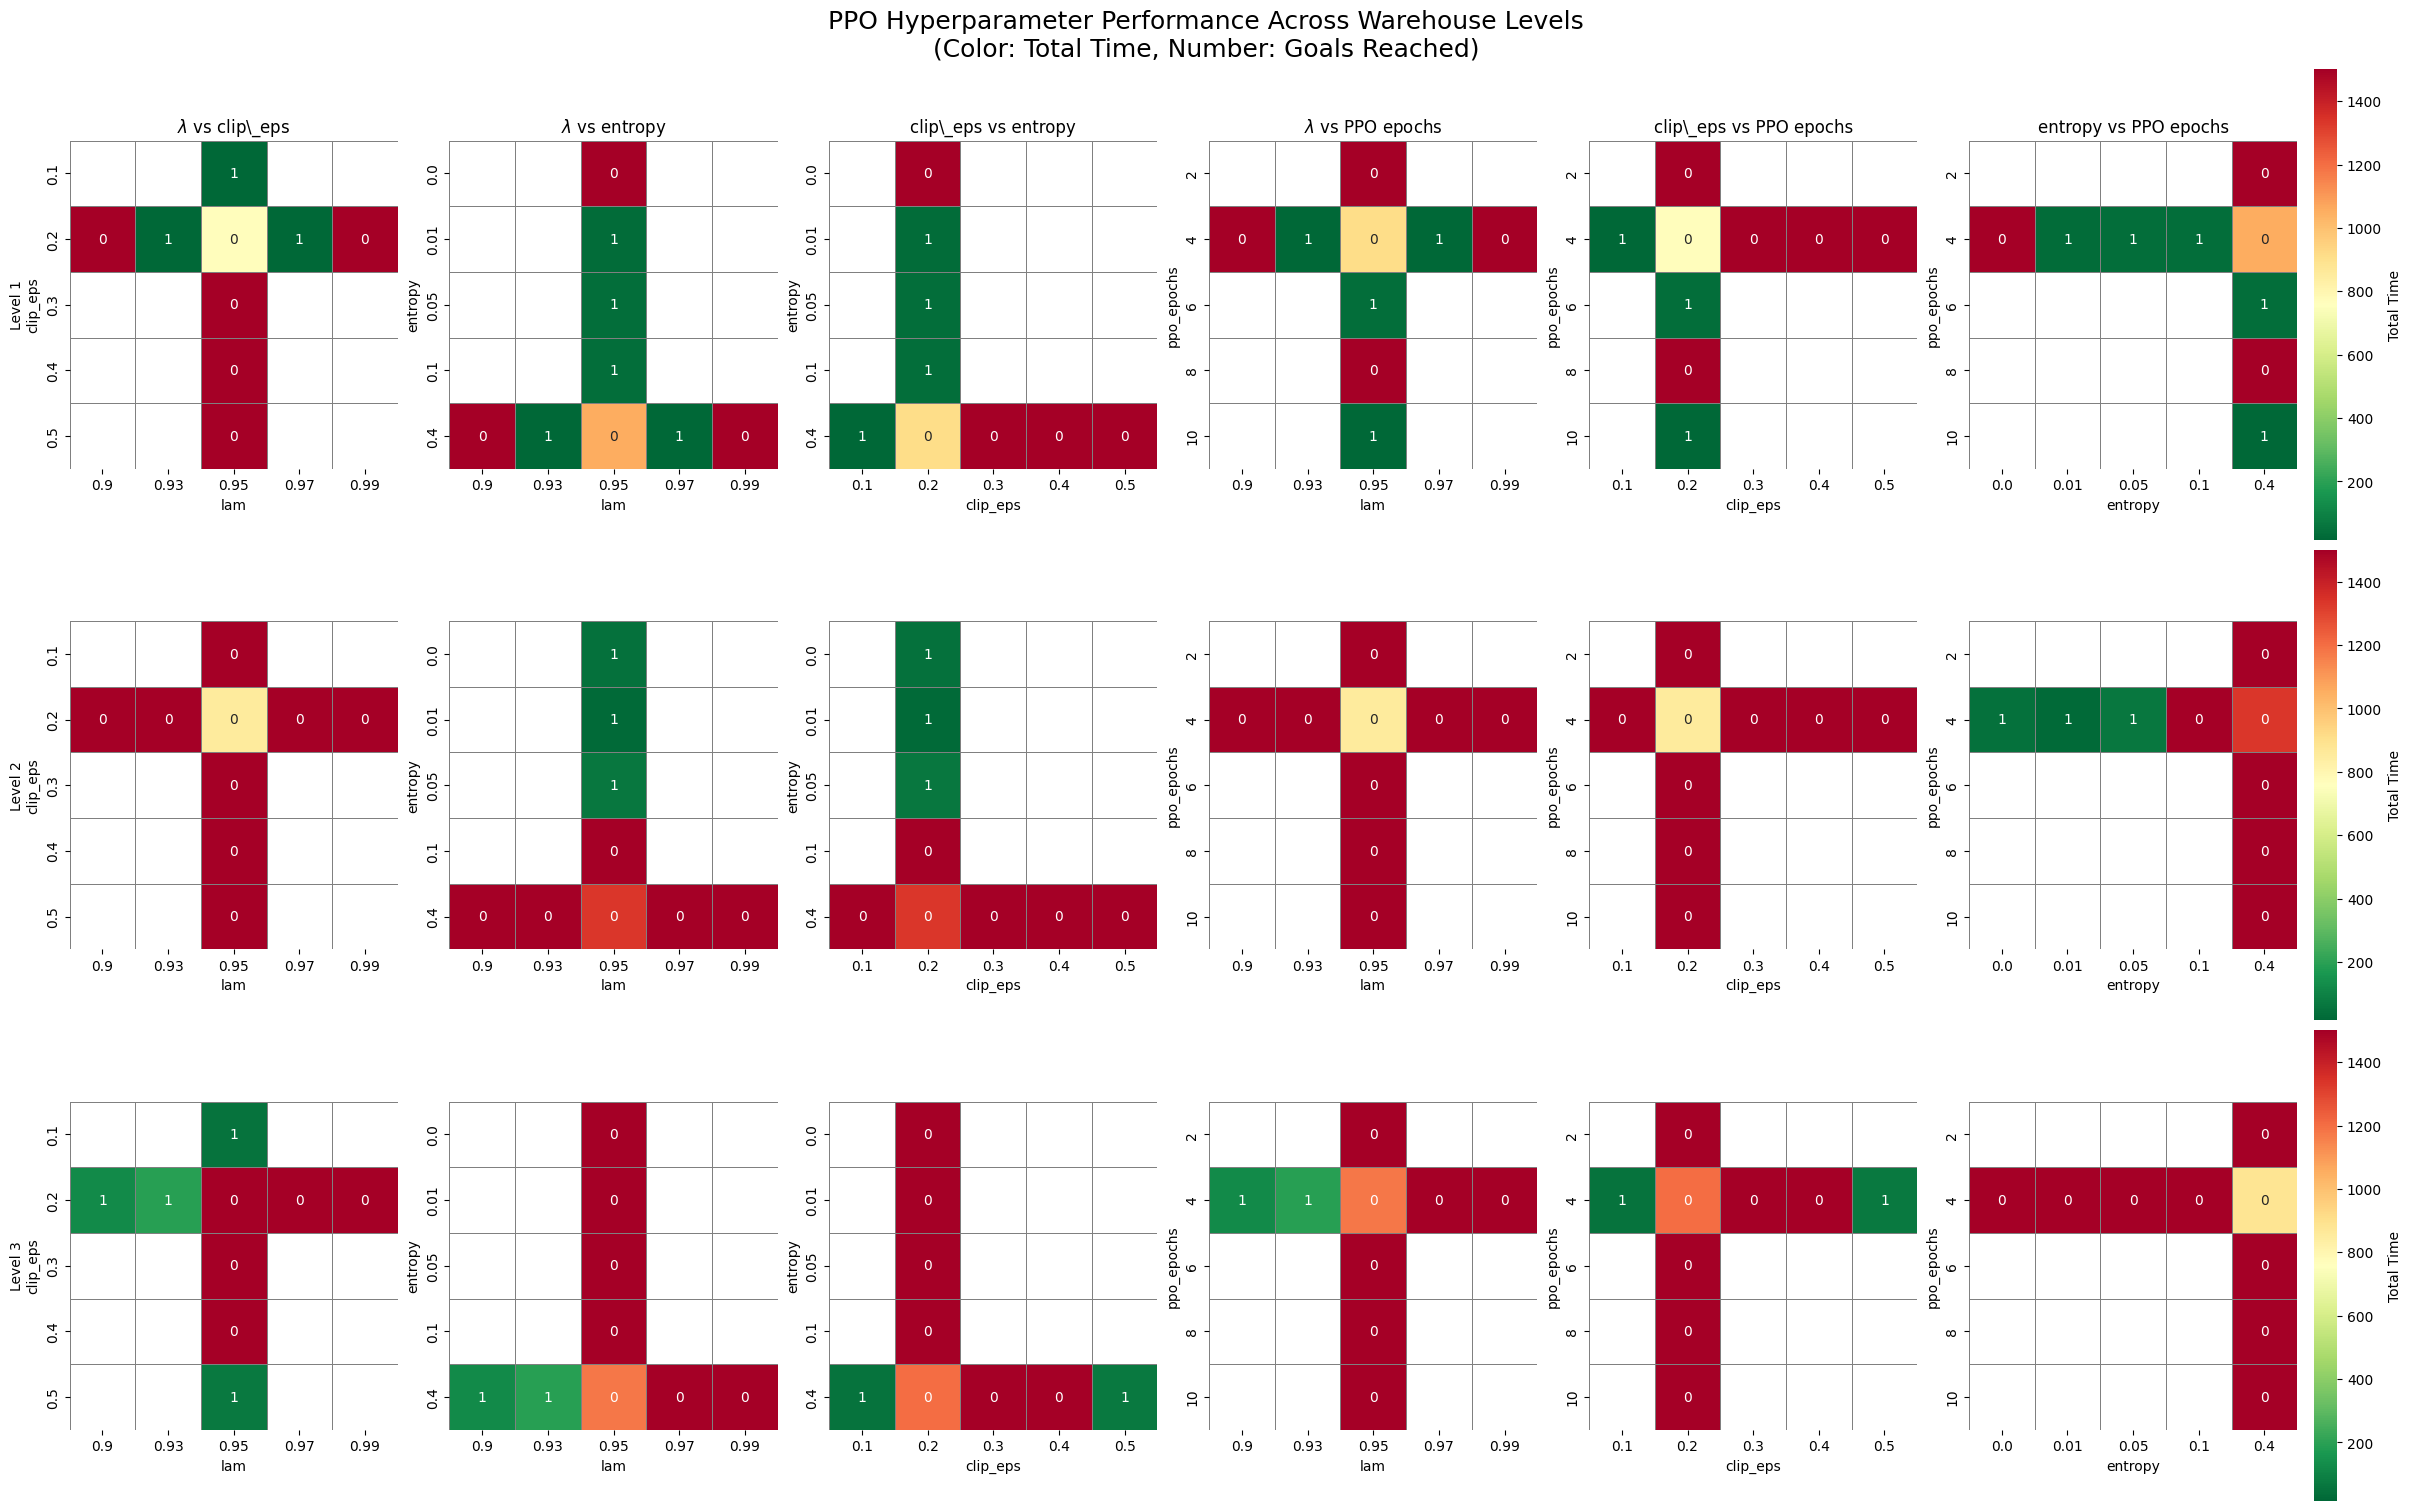

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

param_pairs = [
    ('lam', 'clip_eps'),
    ('lam', 'entropy'),
    ('clip_eps', 'entropy'),
    ('lam', 'ppo_epochs'),
    ('clip_eps', 'ppo_epochs'),
    ('entropy', 'ppo_epochs')
]
pair_titles = {
    ('lam', 'clip_eps'): r'$\lambda$ vs clip\_eps',
    ('lam', 'entropy'): r'$\lambda$ vs entropy',
    ('clip_eps', 'entropy'): r'clip\_eps vs entropy',
    ('lam', 'ppo_epochs'): r'$\lambda$ vs PPO epochs',
    ('clip_eps', 'ppo_epochs'): r'clip\_eps vs PPO epochs',
    ('entropy', 'ppo_epochs'): r'entropy vs PPO epochs'
}

levels = sorted(df['level'].unique())
n_levels = len(levels)
n_pairs = len(param_pairs)

fig, axes = plt.subplots(
    nrows=n_levels, ncols=n_pairs, figsize=(4 * n_pairs, 5 * n_levels),
    constrained_layout=True
)

# Normalize color scale across all levels
global_min = df['total_time'].min()
global_max = df['total_time'].max()

for i, level in enumerate(levels):
    level_df = df[df['level'] == level]
    for j, (xparam, yparam) in enumerate(param_pairs):
        # Prepare data
        heatmap_data = level_df.pivot_table(
            index=yparam, columns=xparam, values='total_time', aggfunc='mean'
        )
        annot_data = level_df.pivot_table(
            index=yparam, columns=xparam, values='goals_reached', aggfunc='mean'
        )
        annot_data_str = annot_data.applymap(lambda x: f"{int(x)}" if not np.isnan(x) else "")
        ax = axes[i, j] if n_levels > 1 else axes[j]
        sns.heatmap(
            heatmap_data, annot=annot_data_str, fmt='', cmap="RdYlGn_r", ax=ax,
            cbar=(j == n_pairs - 1),
            cbar_kws={'label': 'Total Time'} if (j == n_pairs - 1) else None,
            vmin=global_min, vmax=global_max,
            linewidths=0.5, linecolor='gray', square=True
        )
        if i == 0:
            ax.set_title(pair_titles[(xparam, yparam)])
        if j == 0:
            ax.set_ylabel(f'Level {level}\n{yparam}')
        else:
            ax.set_ylabel(yparam)
        ax.set_xlabel(xparam)
plt.suptitle('PPO Hyperparameter Performance Across Warehouse Levels\n(Color: Total Time, Number: Goals Reached)', fontsize=18)
plt.show()


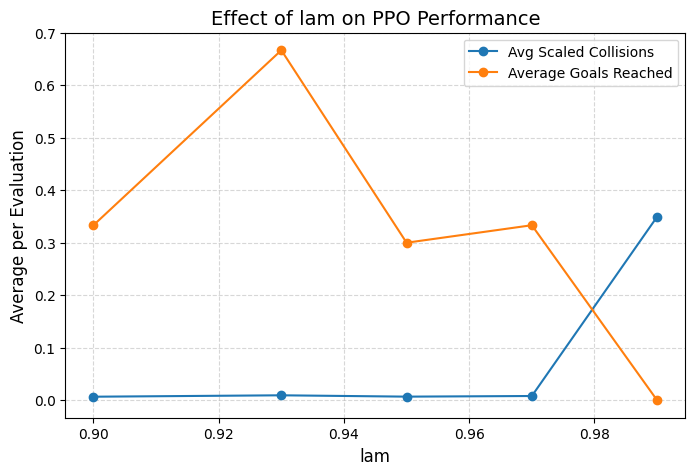

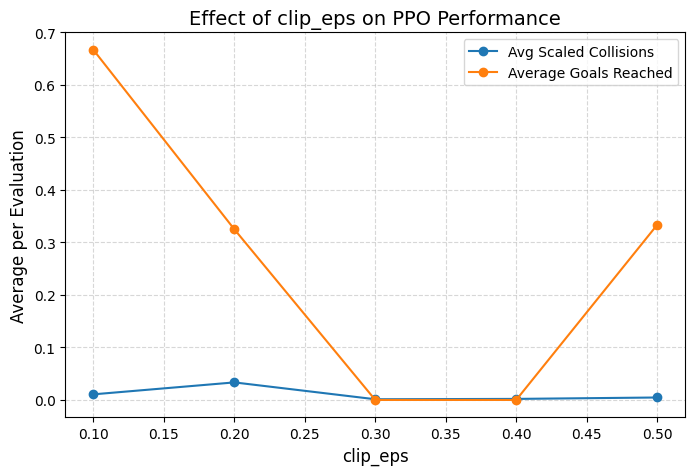

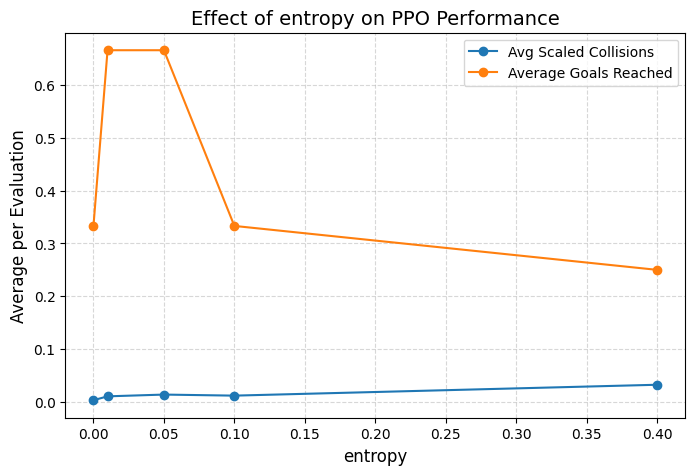

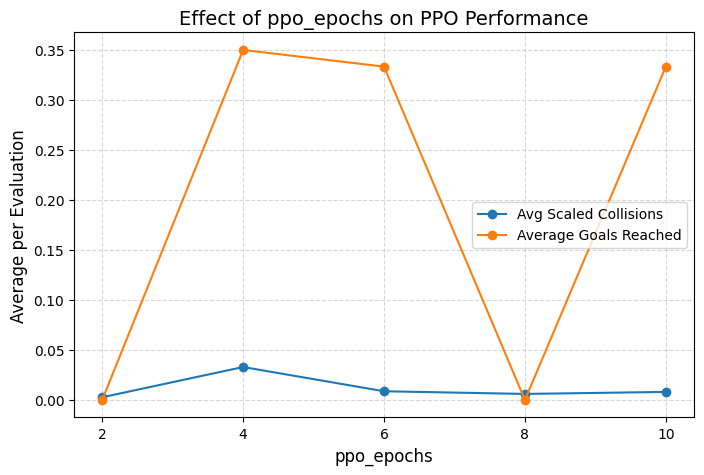

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to your results file
csv_path = 'ppo_evaluation_results.csv'

# Load the data
df = pd.read_csv(csv_path)

# Scale collision_count between 0 and 1
min_collisions = df['collision_count'].min()
max_collisions = df['collision_count'].max()
df['collision_count_scaled'] = (df['collision_count'] - min_collisions) / (max_collisions - min_collisions)

# List of hyperparameters to visualize
params = ['lam', 'clip_eps', 'entropy', 'ppo_epochs']

for param in params:
    # Compute mean scaled collision count and goals reached for each unique value
    agg = df.groupby(param)[['collision_count_scaled', 'goals_reached']].mean().reset_index()
    
    # Plotting
    plt.figure(figsize=(8, 5))
    plt.plot(agg[param], agg['collision_count_scaled'], marker='o', label='Avg Scaled Collisions')
    plt.plot(agg[param], agg['goals_reached'], marker='o', label='Average Goals Reached')
    
    plt.xlabel(param, fontsize=12)
    plt.ylabel('Average per Evaluation', fontsize=12)
    plt.title(f'Effect of {param} on PPO Performance', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()
    
    # If the x-axis is categorical (like integers), force ticks:
    if df[param].dtype in ['int64', 'object']:
        plt.xticks(agg[param])